# 線形モデル

In [10]:
import mglearn
import mglearn.datasets as mgdata # cachedir='cache' を location='cache'に変更
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import LinearSVC # 線形サポートベクタマシン

C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


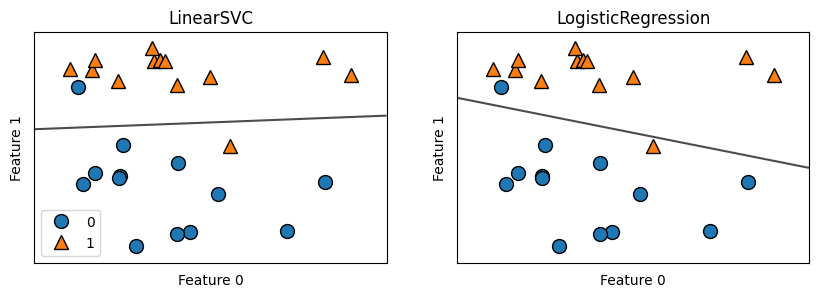

In [20]:
# 決定境界の可視化
X, y = mgdata.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

ラインより上はクラス1 下はクラス0 に分類される。  
X軸 第一特徴量  Y軸 第二特徴量  
どちらとも L2正則化を行っている。

正則化の強度を決定するハイパーパラメータ C がある。  
C が大きくなると正則化は弱くなり、小さくすると係数を0に近づけようとする。

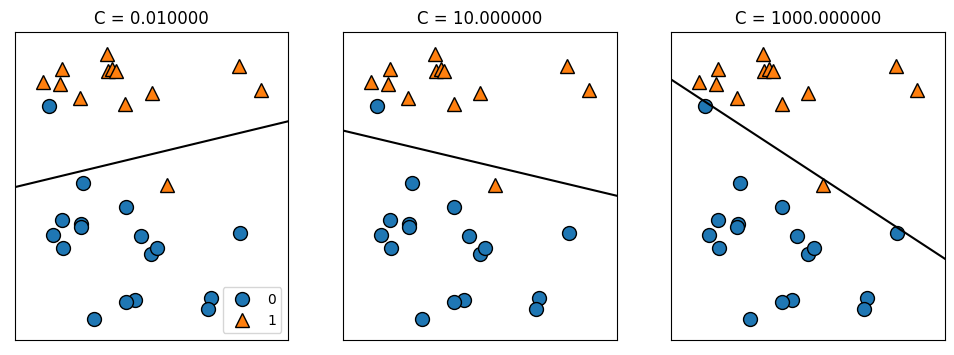

In [14]:
# SVC Cによる違い
mglearn.plots.plot_linear_svc_regularization()

一番右の C が一番大きい場合は決定境界の傾きがかなり急になり、すべてのクラスを正しく分類しようとしている。  
クラス1の1つは分類不可能。  
一番右は適合